In [1]:
data <- read.csv(file = 'data4.csv', header = TRUE, sep = '\t', dec = ',')

In [2]:
data$m <- seq(1, length(data$Contracts))

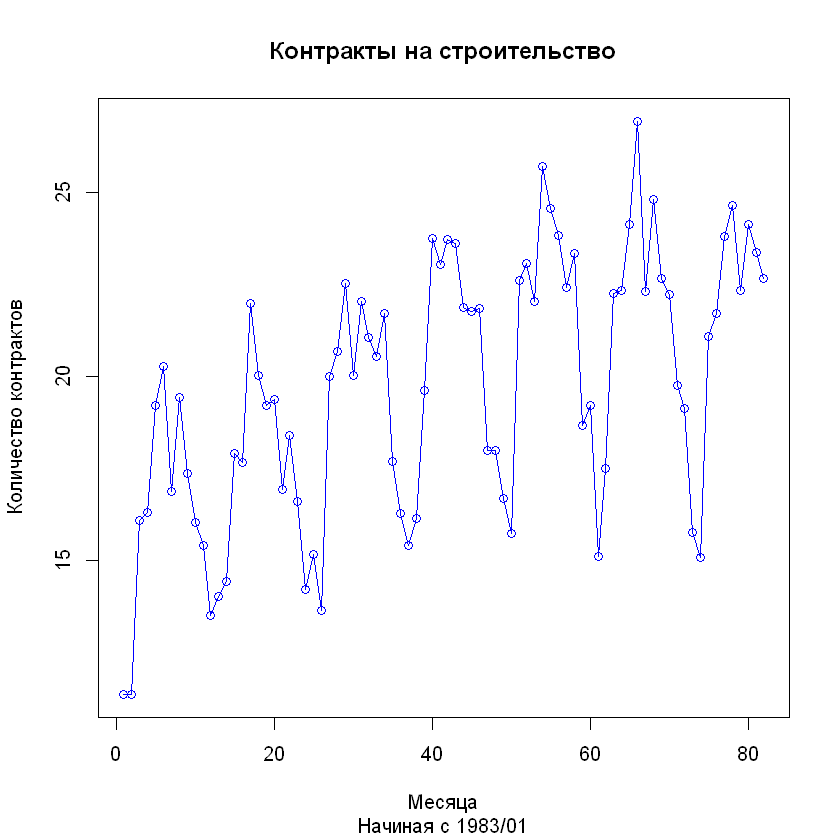

In [3]:
plot(data$m, data$Contracts, main = 'Контракты на строительство',
    xlab = 'Месяца', ylab = 'Количество контрактов', type = 'o',
    col = 'blue', sub = 'Начиная с 1983/01')

Можно предположить, что модель тренда аддитивная

# Аддитивная модель

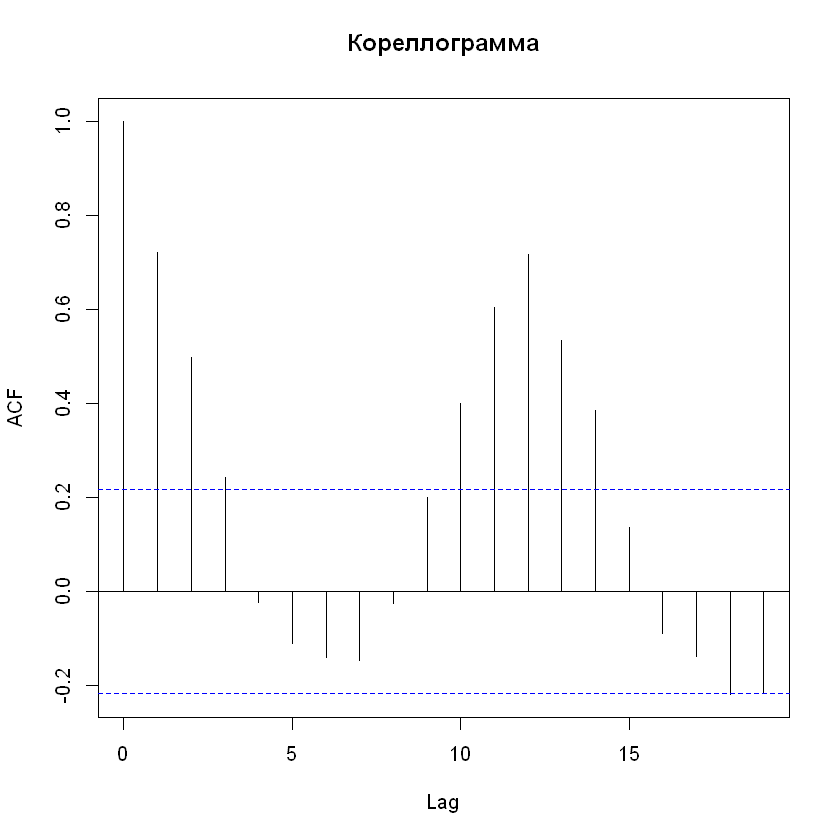

In [4]:
# Строим коррелограмму
acf(data$Contracts, type = 'correlation', plot = TRUE, main = 'Кореллограмма')

По коррелограмме определяем наличие тренда и сезонных колебаний с периодом, равным 12 месяцам

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


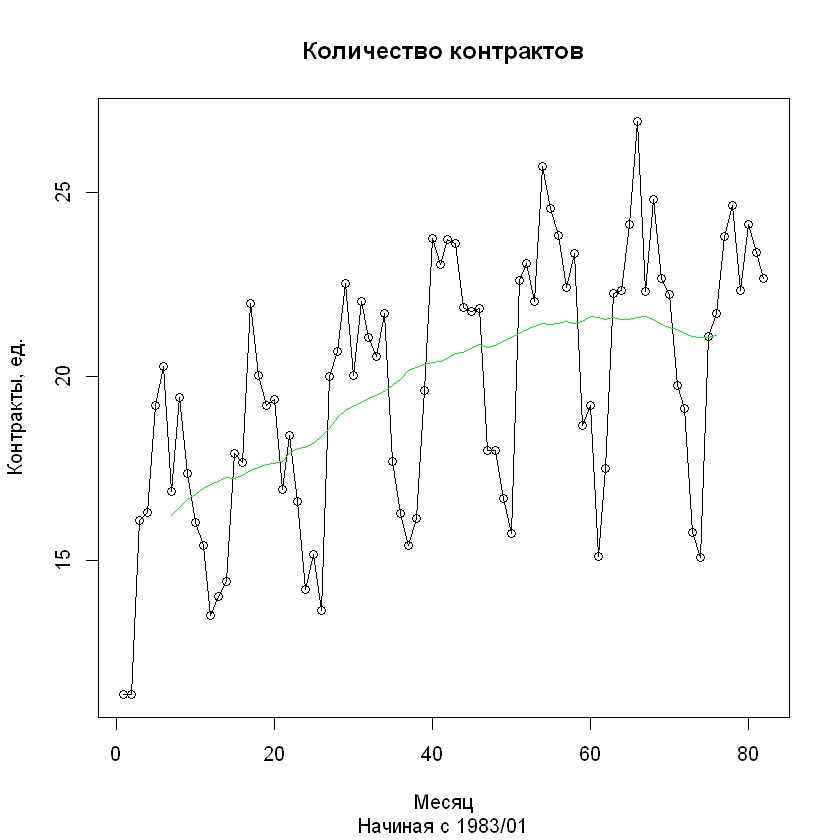

In [5]:
library(forecast)
sn <- ma(data$Contracts, order=12, centre = TRUE)
plot(data$Contracts, main = 'Количество контрактов', ylab = 'Контракты, ед.',
    xlab = 'Месяц', type = 'o', sub = 'Начиная с 1983/01')
lines(sn, col = 'green')

In [6]:
A <- matrix(data = data$Contracts - sn, nrow = 12)
Sm <- apply(A, 1, function(x){mean(x, na.rm = TRUE)})
M.S <- rep(Sm, times = 12)

Warning message in matrix(data = data$Contracts - sn, nrow = 12):
"длина данных [82] не является множителем количества строк [12]"

In [7]:
Tr <- data$Contracts - M.S
T <- seq(1, length(Tr))
regM <- lm(Tr ~ T)
M.Trend <- coef(regM)[1] + coef(regM)[2] * T

Warning message in data$Contracts - M.S:
"длина большего объекта не является произведением длины меньшего объекта"

Warning message in data$Contracts - M.fit:
"длина большего объекта не является произведением длины меньшего объекта"Warning message in (data$Contracts - M.fit)/data$Contracts:
"длина большего объекта не является произведением длины меньшего объекта"

[1] 21.63722

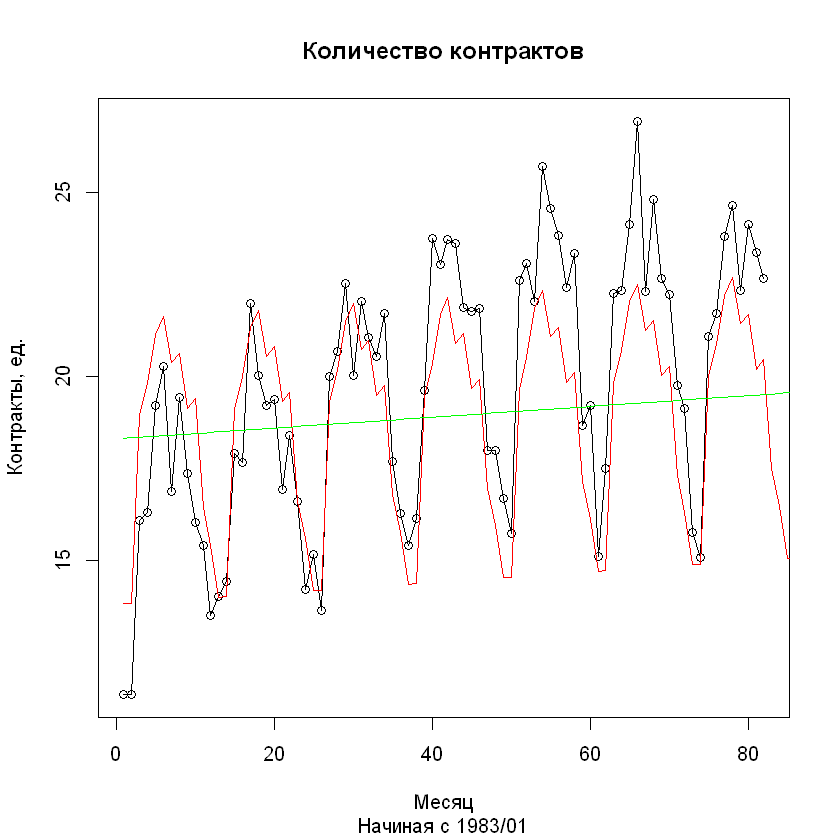

In [8]:
M.fit <- M.Trend + M.S
plot(data$Contracts, main = 'Количество контрактов', ylab = 'Контракты, ед.',
    xlab = 'Месяц', type = 'o', sub = 'Начиная с 1983/01')
lines(M.fit, col = 'red')
lines(M.Trend, col = 'green')
sum(abs((data$Contracts - M.fit)/data$Contracts))/length(data$Contracts)*100

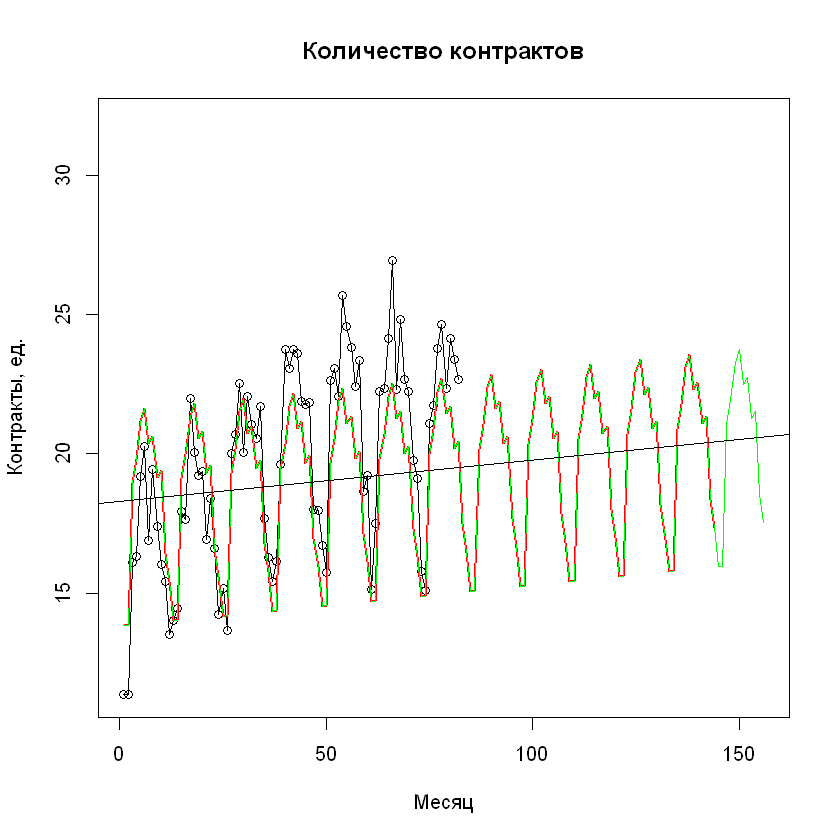

In [9]:
M.F <- array(dim = 12) # создать массив для хранения прогноза
T1 <- seq(from=1, to=144+12) # создать массив для времени прогноза
M.F <- (coef(regM)[1]+coef(regM)[2]*T1) + Sm # рассчитать прогнозные значения
plot(data$Contracts, main="Количество контрактов", ylab="Контракты, ед.",
     xlab="Месяц", type="o", xlim = c(1,144+12),
     ylim = c(min(data$Contracts), max(data$Contracts) + 5)) # график временного ряда
lines(M.fit, col="red", lwd = 2) # график модели временного ряда
lines(x=T1 , y=M.F, col="green") # график прогноза
abline(regM)

Warning message in data$Contracts - M.fit:
"длина большего объекта не является произведением длины меньшего объекта"

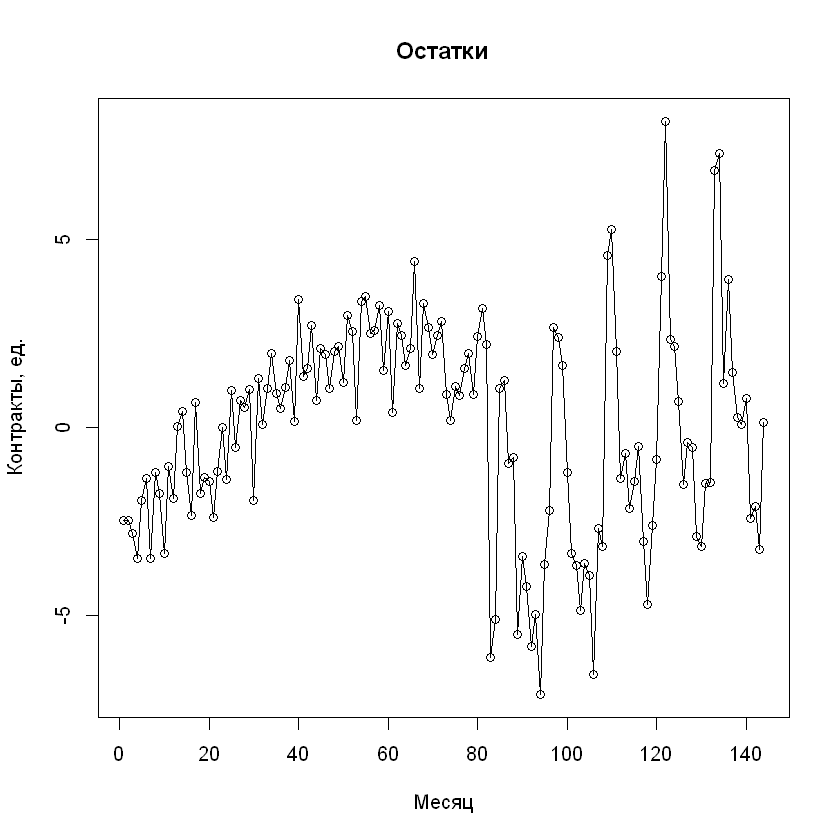


	Box-Pierce test

data:  M.Res
X-squared = 62.423, df = 1, p-value = 2.776e-15


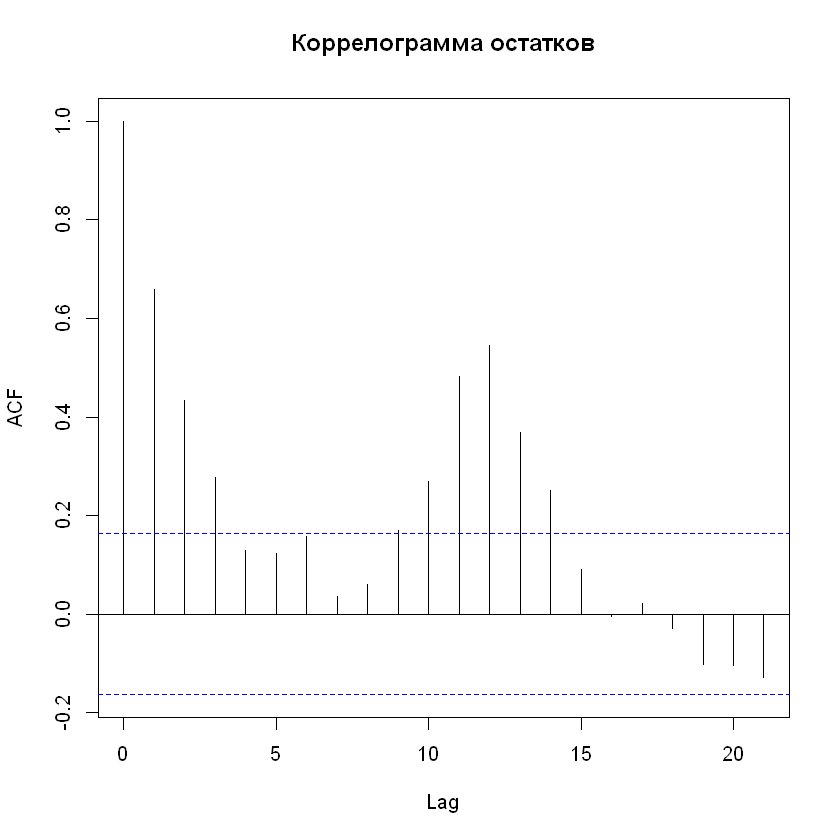

In [10]:
M.Res <- data$Contracts - M.fit # рассчитать остатки
plot(M.Res, type="o", main="Остатки", ylab='Контракты, ед.',
xlab = 'Месяц') # график остатков
acf(M.Res, main="Коррелограмма остатков") # коррелограмма остатков
Box.test(M.Res) # проверить остатки на белый шум

# Мультипликателиваная модель

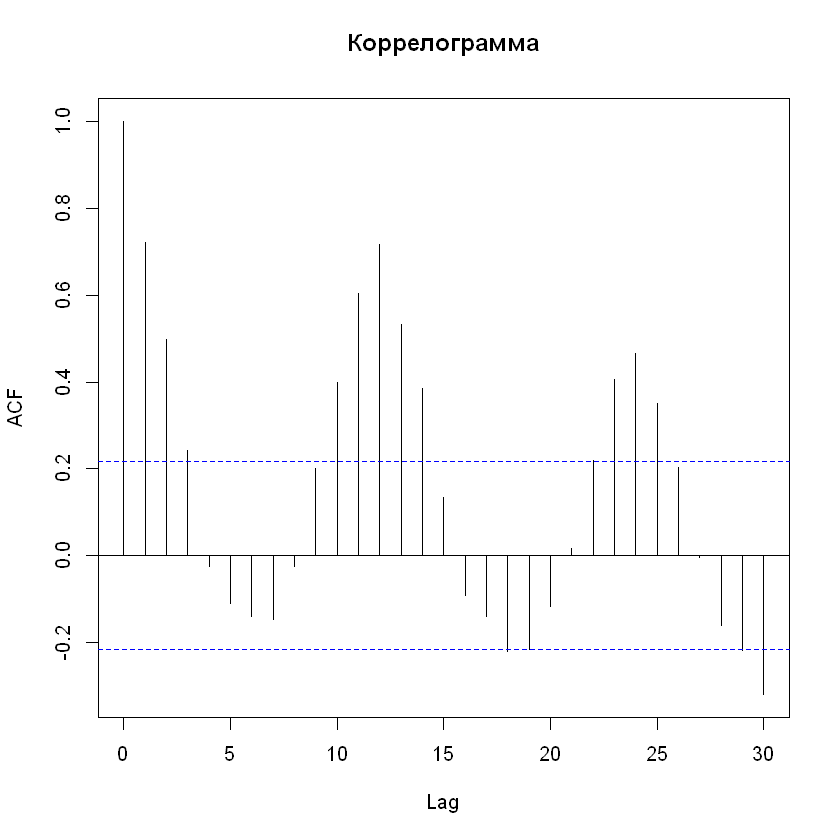

In [11]:
acf(data$Contracts, type="correlation",
    plot=TRUE, main="Коррелограмма", lag.max = 30)

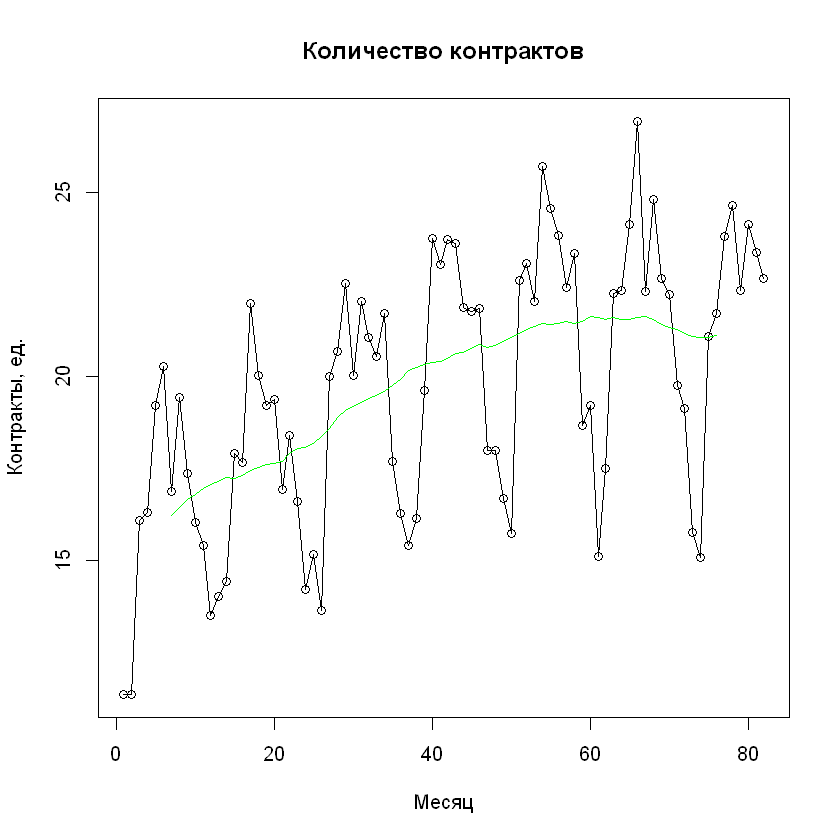

In [12]:
sp <- ma(data$Contracts,
         order=12, centre = TRUE) # сгладить временной ряд методом скользящего среднего
plot(data$Contracts, main="Количество контрактов",
     ylab="Контракты, ед.", xlab="Месяц", type="o")
lines(sp, col="green") # нарисовать сглаженный ряд

In [13]:
Ap <- matrix(data=data$Contracts/sp, nrow = 12) 
# разделить значения временного ряда на сглаженное значение
SP <- apply(Ap, 1, function(x){mean(x, na.rm = TRUE)})
Mp.S <- rep(SP,times=12) # записать сезонную составляющую временного ряда

Warning message in matrix(data = data$Contracts/sp, nrow = 12):
"длина данных [82] не является множителем количества строк [12]"

In [14]:
Trp <- data$Contracts/Mp.S # удалить сезонную составляющую из временного ряда
T <- seq(from=1, to=144) # сформировать значения t
regMp <- lm(Trp ~ T) # построить линейную регрессию
Mp.Trend <- coef(regMp)[1] + coef(regMp)[2] * T # записать тренд для временного ряда

Warning message in data$Contracts/Mp.S:
"длина большего объекта не является произведением длины меньшего объекта"

Warning message in data$Contracts - Mp.fit:
"длина большего объекта не является произведением длины меньшего объекта"Warning message in (data$Contracts - Mp.fit)/data$Contracts:
"длина большего объекта не является произведением длины меньшего объекта"

[1] 21.57088

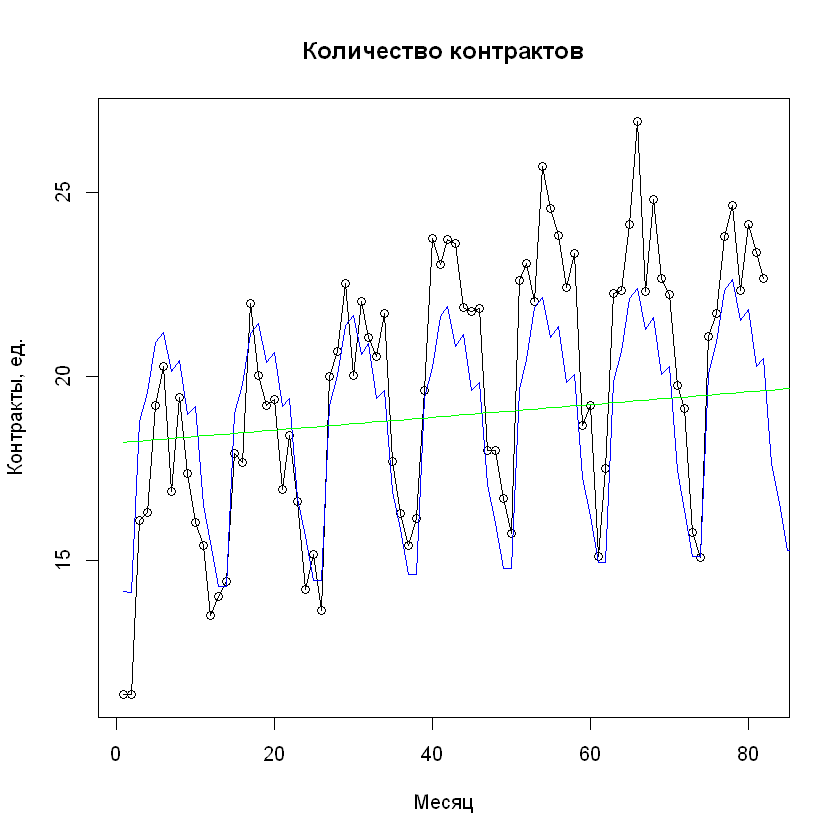

In [15]:
Mp.fit<-Mp.Trend*Mp.S # рассчитать значения временного ряда по модели
plot(data$Contracts, main="Количество контрактов",
     ylab="Контракты, ед.", xlab="Месяц", type="o")
lines(Mp.fit, col="blue") # график модели временного ряда
lines(Mp.Trend, col="green") # график тренда временного ряда
sum(abs((data$Contracts - Mp.fit)/data$Contracts))/length(data$Contracts)*100 # рассчитать MAPE

Warning message in (coef(regMp)[1] + coef(regMp)[2] * T1) * SP:
"длина большего объекта не является произведением длины меньшего объекта"

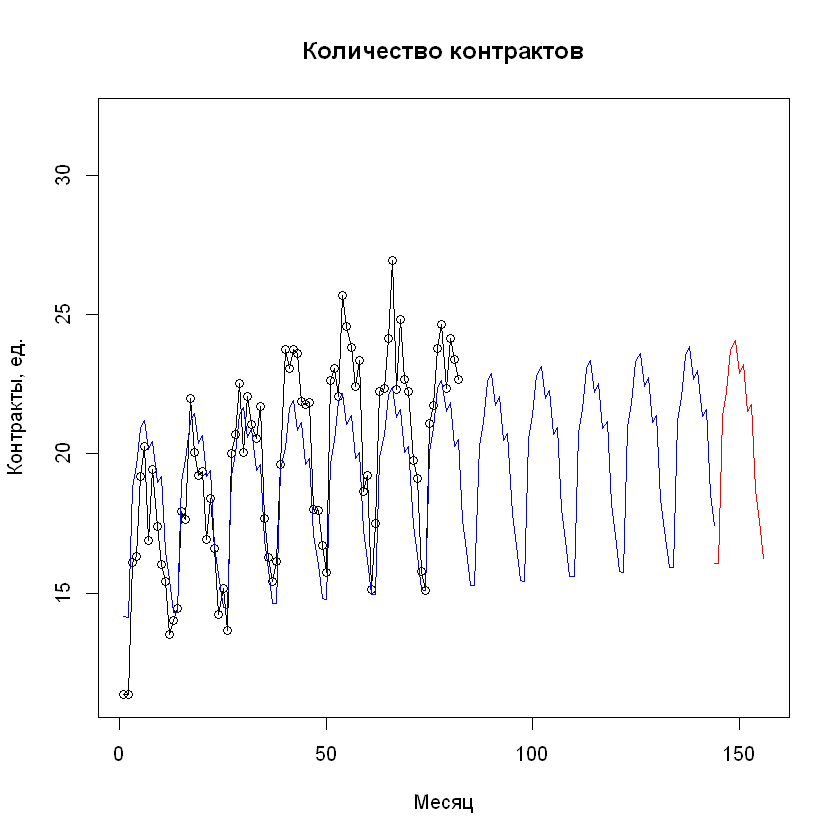

In [16]:
Mp.F <- array(dim = 12) # создать массив для хранения прогноза
T1 <- seq(from=144, to=144+12) # создать массив для времени прогноза
Mp.F <- (coef(regMp)[1]+coef(regMp)[2]*T1)*SP # рассчитать прогнозные значения
plot(data$Contracts, main="Количество контрактов", ylab="Контракты, ед.",
     xlab="Месяц", type="o", xlim = c(1,144+12),
     ylim = c(min(data$Contracts), max(data$Contracts) + 5)) 
# график временного ряда
lines(Mp.fit, col="blue") # график модели временного ряда
lines(x=T1 , y=Mp.F, col="red") # график прогноза

Warning message in data$Contracts - Mp.fit:
"длина большего объекта не является произведением длины меньшего объекта"

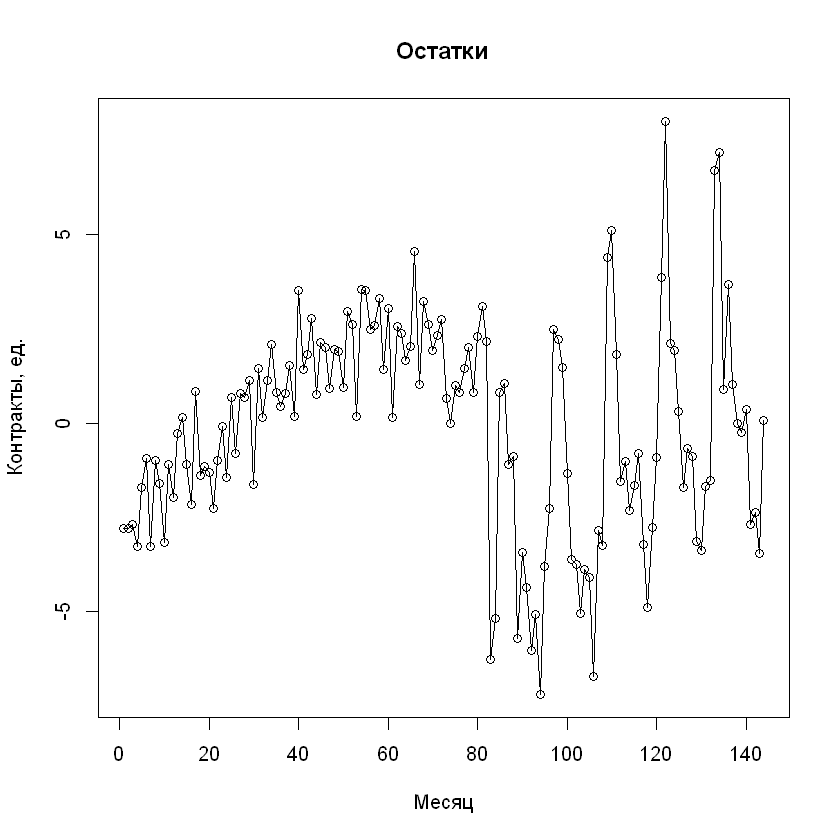


	Box-Pierce test

data:  Mp.Res
X-squared = 62.657, df = 1, p-value = 2.442e-15


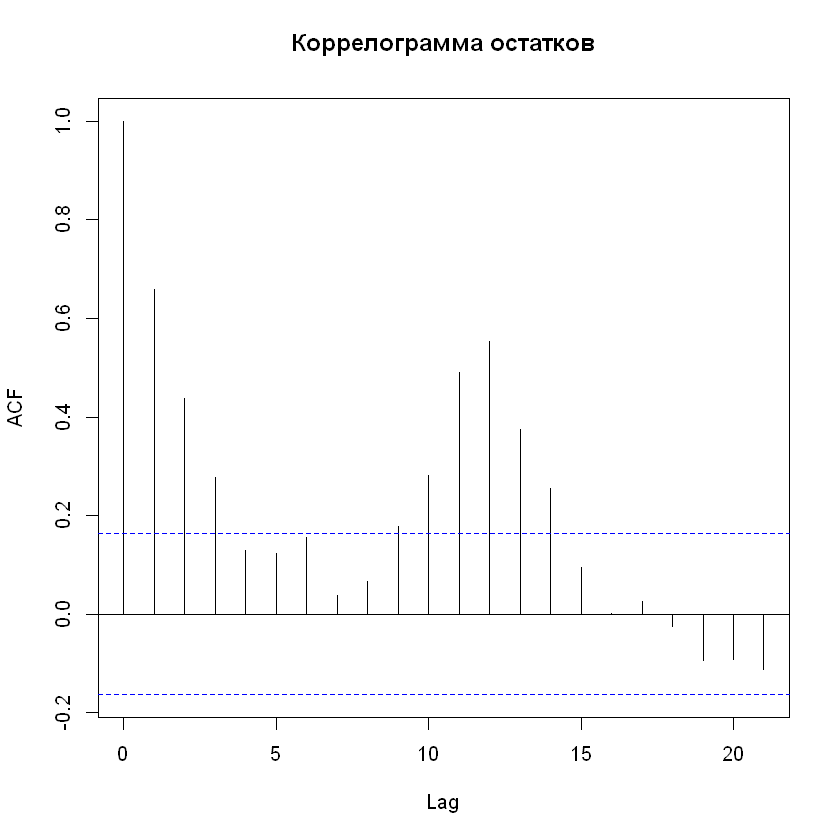

In [17]:
Mp.Res <- data$Contracts - Mp.fit # рассчитать остатки
plot(Mp.Res, type="o", main="Остатки", ylab="Контракты, ед.", xlab="Месяц") 
# график остатков
acf(Mp.Res, main="Коррелограмма остатков") # коррелограмма остатков
Box.test(Mp.Res) # проверить остатки на белый шум